In [2]:
# CNN_assignment by Sanghveena Jondhle

Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

Motivation: To create a multiclass classification model using a custom convolutional neural network in tensorflow

Data Summary:

The dataset consists of 2357 images of malignant and benign oncological diseases, which were formed from the International Skin Imaging Collaboration (ISIC). All images were sorted according to the classification taken with ISIC, and all subsets were divided into the same number of images, with the exception of melanomas and moles, whose images are slightly dominant.

The data set contains the following diseases:

Actinic keratosis
Basal cell carcinoma
Dermatofibroma
Melanoma
Nevus
Pigmented benign keratosis
Seborrheic keratosis
Squamous cell carcinoma
Vascular lesion


**Importing Skin Cancer Data**

# **Importing all the important libraries**









In [3]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from glob import glob

In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [5]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
root_path = '/content/gdrive/MyDrive/CNN_assignment/Skin_cancer_data_store'
data_dir_train = pathlib.Path(root_path + '/Train')
data_dir_test = pathlib.Path(root_path + '/Test')

In [6]:
os.listdir(data_dir_train)

['vascular lesion',
 'squamous cell carcinoma',
 'dermatofibroma',
 'basal cell carcinoma',
 'melanoma',
 'seborrheic keratosis',
 'actinic keratosis',
 'pigmented benign keratosis',
 'nevus']

In [7]:
os.listdir(data_dir_test)

['vascular lesion',
 'nevus',
 'dermatofibroma',
 'melanoma',
 'actinic keratosis',
 'seborrheic keratosis',
 'squamous cell carcinoma',
 'pigmented benign keratosis',
 'basal cell carcinoma']

In [8]:
import glob
image_count_train = len(list(glob.glob(str(data_dir_train) + '/**/*.jpg')))
print(image_count_train)
image_count_test = len(list(glob.glob(str(data_dir_test) + '/**/*.jpg')))
print(image_count_test)

2239
118


Load using keras.preprocessing
Let's load these images off disk using the helpful image_dataset_from_directory utility.

# Create a dataset
Define some parameters for the loader:

In [9]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [10]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [11]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [12]:
# List out all the classes of skin cancer and store them in a list.
# You can find the class names in the class_names attribute on these datasets.
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


# Visualize the data

Todo, create a code to visualize one instance of all the nine classes present in the dataset

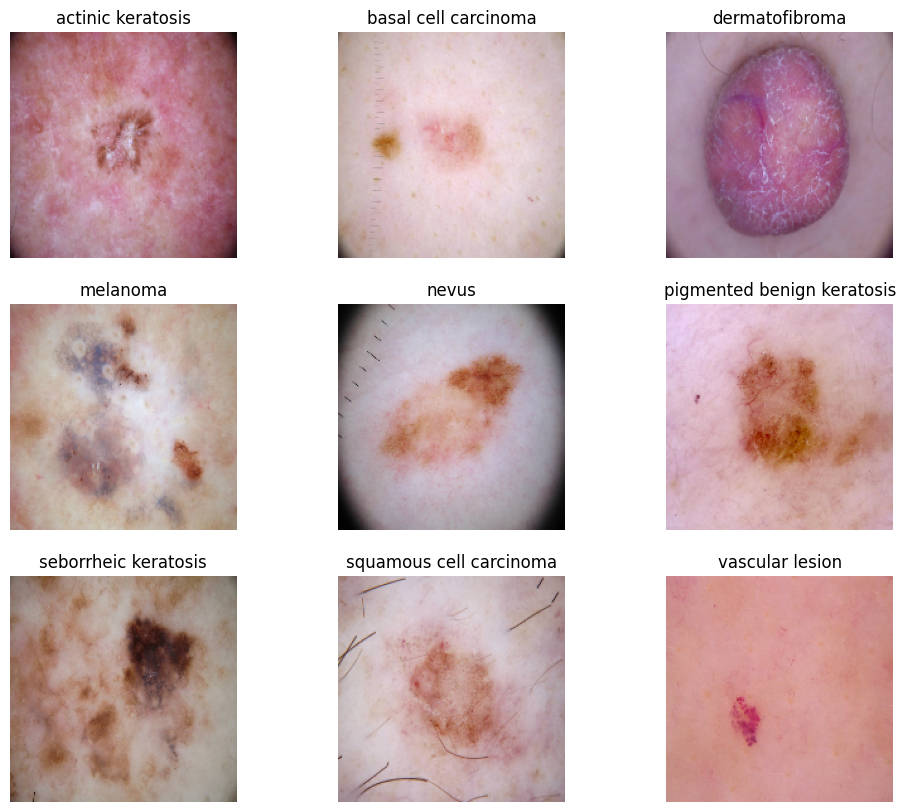

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,10))
for i in range(len(class_names)):
  filtered_ds = train_ds.filter(lambda x,l:tf.math.equal(l[0], i))
  for image, label in filtered_ds.take(1):
    ax = plt.subplot(3,3,i+1)
    plt.imshow(image[0].numpy().astype('uint8'))
    plt.title(class_names[label.numpy()[0]])
    plt.axis('off')

The image_batch is a tensor of the shape (32, 180, 180, 3). This is a batch of 32 images of shape 180x180x3 (the last dimension refers to color channels RGB). The label_batch is a tensor of the shape (32,), these are corresponding labels to the 32 images.

Dataset.cache() keeps the images in memory after they're loaded off disk during the first epoch.

Dataset.prefetch() overlaps data preprocessing and model execution while training.

In [14]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

# Create the model

Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use layers.experimental.preprocessing.Rescaling to normalize pixel values between (0,1). The RGB channel values are in the [0, 255] range. This is not ideal for a neural network. Here, it is good to standardize values to be in the [0, 1]

In [15]:
# import tensorflow as tf
# from tensorflow.keras import layers
# from tensorflow.keras.models import Sequential

# input_shape = (180,180,3)
# lr = 1e-5
# init = 'normal'
# activ = 'relu'
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])


# Compile the model

Choose an appropirate optimiser and loss function for model training

In [16]:
### Todo, choose an appropirate optimiser and loss function

# optimizer = 'adam'
# loss_fn = "binary_crossentropy"
# model.compile(optimizer=optimizer,
#               loss=loss_fn,
#               metrics=['accuracy'])

In [17]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 90, 90, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 45, 45, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

# Train the model

In [19]:
epochs = 20
batch_size = 32

history = model.fit(
  train_ds,
  # batch_size=batch_size,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 181s 3s/step - loss: 1.8925 - accuracy: 0.3013 - val_loss: 1.6503 - val_accuracy: 0.4072
Epoch 2/20
56/56 [==============================] - 61s 1s/step - loss: 1.5710 - accuracy: 0.4330 - val_loss: 1.5686 - val_accuracy: 0.4183
Epoch 3/20
56/56 [==============================] - 60s 1s/step - loss: 1.4436 - accuracy: 0.4894 - val_loss: 1.4024 - val_accuracy: 0.5213
Epoch 4/20
56/56 [==============================] - 56s 1s/step - loss: 1.2849 - accuracy: 0.5469 - val_loss: 1.3669 - val_accuracy: 0.5302
Epoch 5/20
56/56 [==============================] - 59s 1s/step - loss: 1.2898 - accuracy: 0.5352 - val_loss: 1.5265 - val_accuracy: 0.5011
Epoch 6/20
56/56 [==============================] - 60s 1s/step - loss: 1.1634 - accuracy: 0.5882 - val_loss: 1.3427 - val_accuracy: 0.5235
Epoch 7/20
56/56 [==============================] - 58s 1s/step - loss: 1.0202 - accuracy: 0.6350 - val_loss: 1.4736 - val_accuracy: 0.4989
Epoch 8/20
56/56 [=

# Visualizing training results

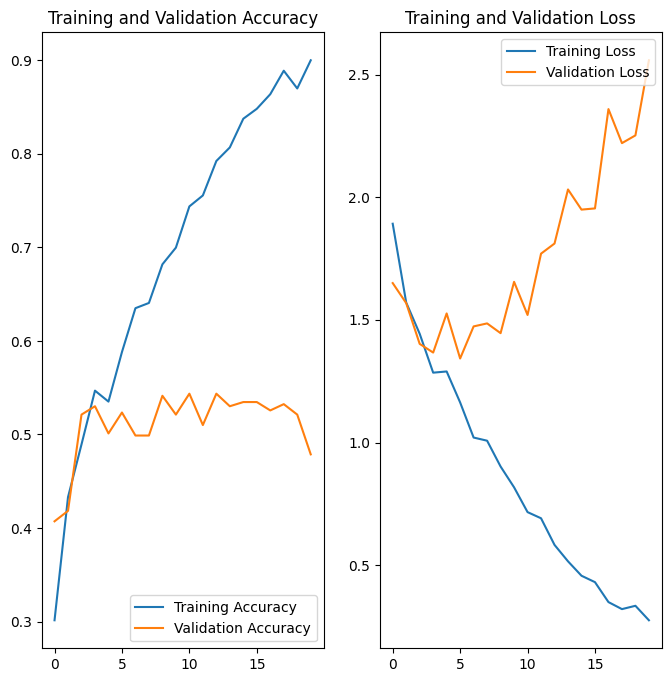

In [20]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']


epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Findings:
1] We can clearly observe a drastic difference between Traning and Validation Accuracy, which indicates that the model has overfitted
2] Also we can observe that the validation accuracy the model has achieved is below 55 %
Overall we need to apply techniques like Data Augmentation and Dropout to handle the overfitting issue of the model

# Data Augumentation

In [21]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

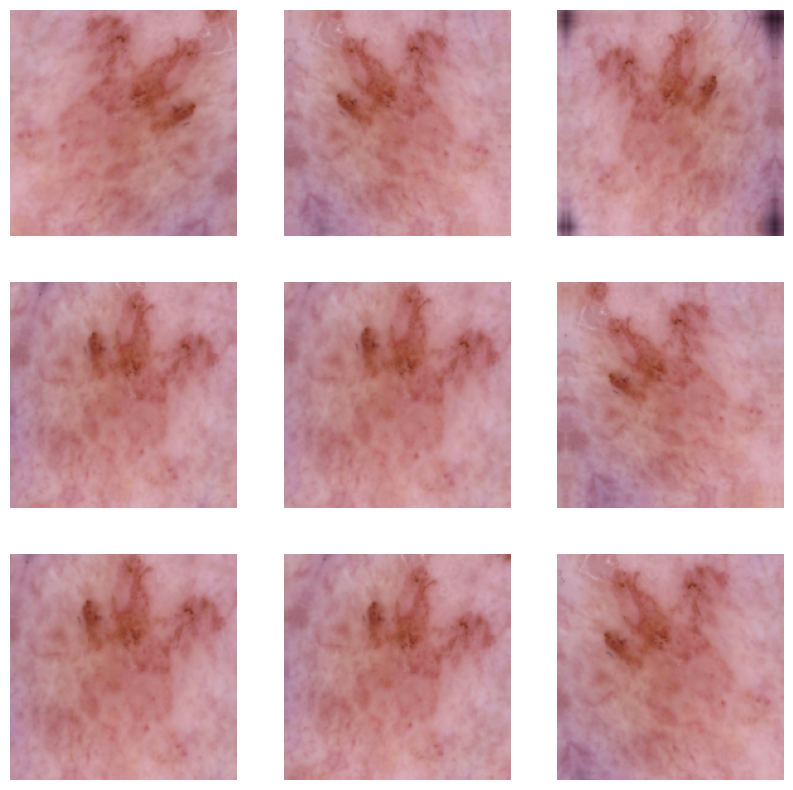

In [22]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

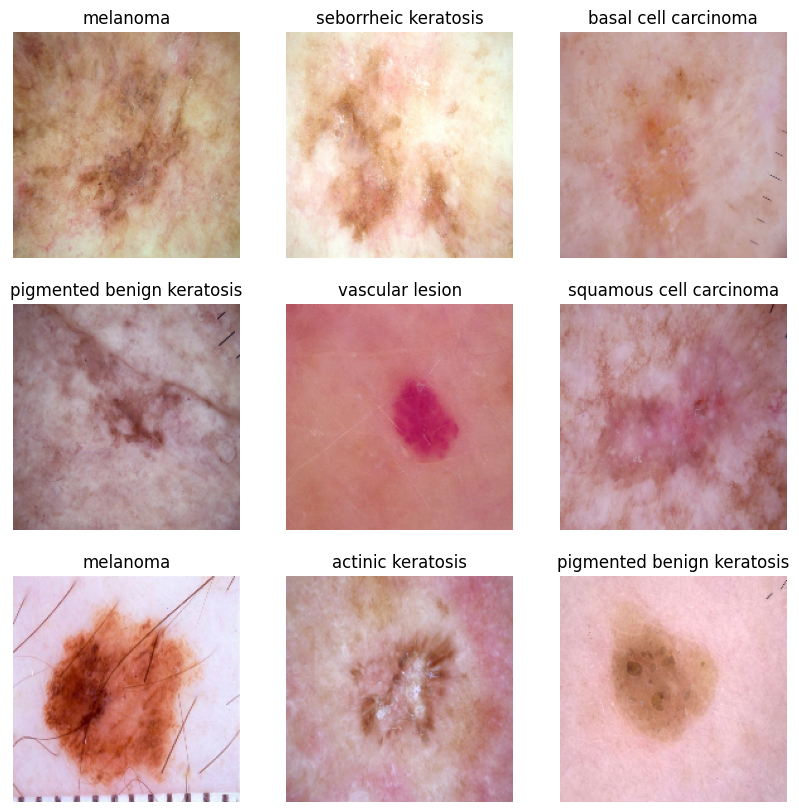

In [23]:
# visualize how your augmentation strategy works for one instance of training image.
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

# Create the model, compile and train the model

In [24]:
model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

# Compiling the model

In [25]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Training the model

In [26]:
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 72s 1s/step - loss: 2.1470 - accuracy: 0.2405 - val_loss: 2.0032 - val_accuracy: 0.2640
Epoch 2/20
56/56 [==============================] - 68s 1s/step - loss: 1.7847 - accuracy: 0.3521 - val_loss: 1.6273 - val_accuracy: 0.4586
Epoch 3/20
56/56 [==============================] - 68s 1s/step - loss: 1.6526 - accuracy: 0.4208 - val_loss: 1.6839 - val_accuracy: 0.3982
Epoch 4/20
56/56 [==============================] - 68s 1s/step - loss: 1.5016 - accuracy: 0.4760 - val_loss: 1.5013 - val_accuracy: 0.5213
Epoch 5/20
56/56 [==============================] - 68s 1s/step - loss: 1.4348 - accuracy: 0.5017 - val_loss: 1.4874 - val_accuracy: 0.4810
Epoch 6/20
56/56 [==============================] - 72s 1s/step - loss: 1.3679 - accuracy: 0.5184 - val_loss: 1.6740 - val_accuracy: 0.4877
Epoch 7/20
56/56 [==============================] - 67s 1s/step - loss: 1.4015 - accuracy: 0.4983 - val_loss: 1.4133 - val_accuracy: 0.5324
Epoch 8/20
56/56 [==

# Visualizing the results

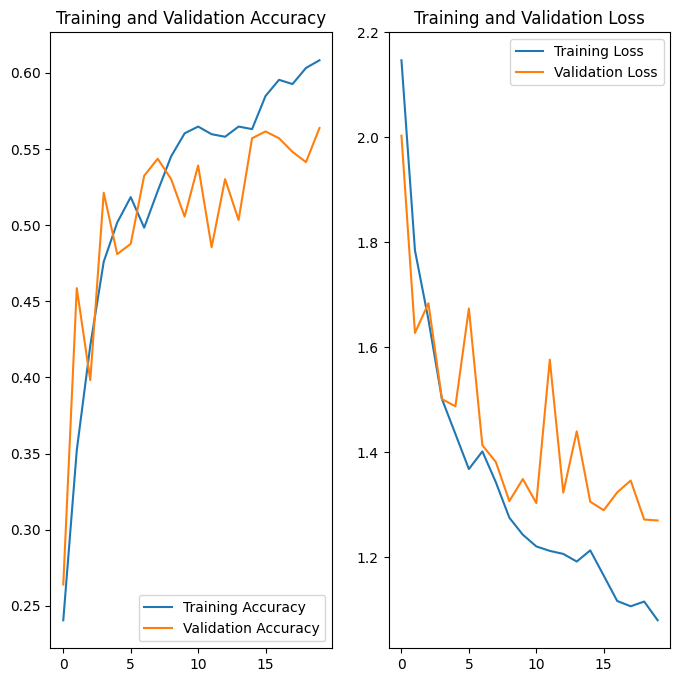

In [27]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Findings:
As we can see that now the Training and Validation accuracy are almost in the same level and the highest accuracy achieved is around 62% , this shows the impact of how performing Data Augmentation can improve the model performance
But we can still try to increase the accuracy of the model

# Find the distribution of classes in the training dataset.
Context: Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [28]:
!pip install glob2
import glob2

path_list = [x for x in glob2.glob(os.path.join(data_dir_train, '*', '*.jpg'))]
lesion_list = [os.path.basename(os.path.dirname(y)) for y in glob2.glob(os.path.join(data_dir_train, '*', '*.jpg'))]
dataframe_dict_original = dict(zip(path_list, lesion_list))
df = pd.DataFrame(list(dataframe_dict_original.items()),columns = ['Path','Label'])
df

,Path,Label
0,/content/gdrive/MyDrive/CNN_assignment/Skin_ca...,vascular lesion
1,/content/gdrive/MyDrive/CNN_assignment/Skin_ca...,vascular lesion
2,/content/gdrive/MyDrive/CNN_assignment/Skin_ca...,vascular lesion
3,/content/gdrive/MyDrive/CNN_assignment/Skin_ca...,vascular lesion
4,/content/gdrive/MyDrive/CNN_assignment/Skin_ca...,vascular lesion
...,...,...
2234,/content/gdrive/MyDrive/CNN_assignment/Skin_ca...,nevus
2235,/content/gdrive/MyDrive/CNN_assignment/Skin_ca...,nevus
2236,/content/gdrive/MyDrive/CNN_assignment/Skin_ca...,nevus
2237,/content/gdrive/MyDrive/CNN_assignment/Skin_ca...,nevus


Todo: Write your findings here:
- Which class has the least number of samples?
- Which classes dominate the data in terms proportionate number of samples?

Class=8, n=139 (6.208%)
Class=7, n=181 (8.084%)
Class=2, n=95 (4.243%)
Class=1, n=376 (16.793%)
Class=3, n=438 (19.562%)
Class=6, n=77 (3.439%)
Class=0, n=114 (5.092%)
Class=5, n=462 (20.634%)
Class=4, n=357 (15.945%)


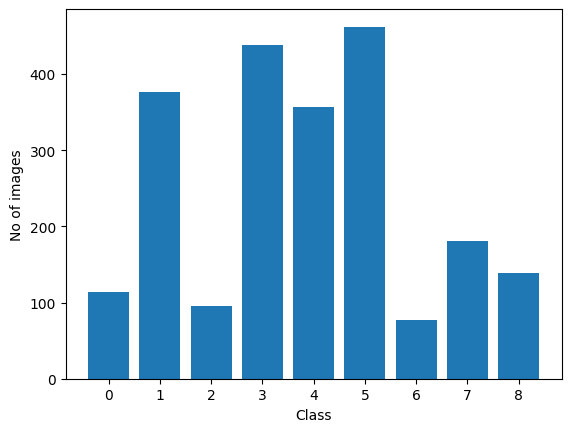

In [29]:
from sklearn.preprocessing import LabelEncoder
from collections import Counter

X, y = df['Path'], df['Label']
y = LabelEncoder().fit_transform(y)
counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))

plt.bar(counter.keys(), counter.values())
plt.xticks([i for i in range(9)])
plt.xlabel("Class")
plt.ylabel("No of images")
plt.show()


- Which class has the least number of samples?¶
Ans] From the above bar chart we can see that the class with label 6 () has the least number of samples

- Which classes dominate the data in terms proportionate number of samples?
Ans] We can observe that of all the class, class with label 5() has the most number of samples

Todo: Rectify the class imbalance

In [30]:
!pip install Augmentor

To use Augmentor, the following general procedure is followed:

1. Instantiate a Pipeline object pointing to a directory containing your initial image data set.
2. Define a number of operations to perform on this data set using your Pipeline object.
3. Execute these operations by calling the Pipeline’s sample() method.

In [31]:
path_to_training_dataset="/content/gdrive/MyDrive/CNN_assignment/Skin_cancer_data_store/Train/"
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i )
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN_assignment/Skin_cancer_data_store/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x78E45FC1E980>: 100%|██████████| 500/500 [00:30<00:00, 16.64 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN_assignment/Skin_cancer_data_store/Train/basal cell carcinoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x78E45FC3F340>: 100%|██████████| 500/500 [00:31<00:00, 15.77 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN_assignment/Skin_cancer_data_store/Train/dermatofibroma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x78E45FFF2E30>: 100%|██████████| 500/500 [00:27<00:00, 18.37 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN_assignment/Skin_cancer_data_store/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=824x719 at 0x78E45FC607F0>: 100%|██████████| 500/500 [01:50<00:00,  4.53 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN_assignment/Skin_cancer_data_store/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=1504x1129 at 0x78E45E2A9AE0>: 100%|██████████| 500/500 [01:41<00:00,  4.92 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN_assignment/Skin_cancer_data_store/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x78E45FF73430>: 100%|██████████| 500/500 [00:22<00:00, 21.97 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN_assignment/Skin_cancer_data_store/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x78E45FC61C90>: 100%|██████████| 500/500 [00:51<00:00,  9.64 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN_assignment/Skin_cancer_data_store/Train/squamous cell carcinoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x78E45E2B88E0>: 100%|██████████| 500/500 [00:24<00:00, 20.25 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN_assignment/Skin_cancer_data_store/Train/vascular lesion/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x78E45FBD7670>: 100%|██████████| 500/500 [00:23<00:00, 21.41 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [32]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [33]:
import glob

path_list_new = [x for x in glob.glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list_new

['/content/gdrive/MyDrive/CNN_assignment/Skin_cancer_data_store/Train/vascular lesion/output/vascular lesion_original_ISIC_0024475.jpg_7920ae55-0901-44ca-90f1-1813353ebc4c.jpg',
 '/content/gdrive/MyDrive/CNN_assignment/Skin_cancer_data_store/Train/vascular lesion/output/vascular lesion_original_ISIC_0028680.jpg_831b1a0e-28bc-476c-9dfa-7c2e80f3cd60.jpg',
 '/content/gdrive/MyDrive/CNN_assignment/Skin_cancer_data_store/Train/vascular lesion/output/vascular lesion_original_ISIC_0031648.jpg_a6255219-a839-4b1e-bb8c-daf6c6edee4d.jpg',
 '/content/gdrive/MyDrive/CNN_assignment/Skin_cancer_data_store/Train/vascular lesion/output/vascular lesion_original_ISIC_0027888.jpg_b1f519f1-71b4-41f5-8f91-2d3b3cad8821.jpg',
 '/content/gdrive/MyDrive/CNN_assignment/Skin_cancer_data_store/Train/vascular lesion/output/vascular lesion_original_ISIC_0025612.jpg_8bc7237d-c788-420c-bec2-0859f24f29a2.jpg',
 '/content/gdrive/MyDrive/CNN_assignment/Skin_cancer_data_store/Train/vascular lesion/output/vascular lesion_o

In [34]:
import glob

path_list = [x for x in glob.glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in path_list]
lesion_list_new

['vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',


In [35]:
dataframe_dict_new = dict(zip(path_list_new, lesion_list_new))

In [36]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
#new_df = original_df.append(df2)

In [37]:
new_df = df2

In [38]:
new_df['Label'].value_counts()

Label
vascular lesion               500
squamous cell carcinoma       500
dermatofibroma                500
basal cell carcinoma          500
melanoma                      500
seborrheic keratosis          500
actinic keratosis             500
pigmented benign keratosis    500
nevus                         500
Name: count, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [39]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [40]:
data_dir_train="/content/gdrive/MyDrive/CNN_assignment/Skin_cancer_data_store/Train/"
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
validation_split = 0.2,
subset = 'training',  # Todo choose the correct parameter value, so that only training data is refered to,,
image_size = (img_height, img_width),
batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


#### **Todo:** Create a validation dataset

In [41]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
validation_split = 0.2,
subset = "validation",  # Todo choose the correct parameter value, so that only validation data is refered to,
image_size=(img_height, img_width),
batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [42]:
model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [43]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#### **Todo:**  Train your model

In [44]:

epochs = 30
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)


Epoch 1/30
169/169 [==============================] - 268s 2s/step - loss: 1.8333 - accuracy: 0.3021 - val_loss: 1.6517 - val_accuracy: 0.4068
Epoch 2/30
169/169 [==============================] - 271s 2s/step - loss: 1.5195 - accuracy: 0.4151 - val_loss: 1.3843 - val_accuracy: 0.4892
Epoch 3/30
169/169 [==============================] - 271s 2s/step - loss: 1.3997 - accuracy: 0.4573 - val_loss: 1.2752 - val_accuracy: 0.5071
Epoch 4/30
169/169 [==============================] - 251s 1s/step - loss: 1.2955 - accuracy: 0.5074 - val_loss: 1.2420 - val_accuracy: 0.5449
Epoch 5/30
169/169 [==============================] - 250s 1s/step - loss: 1.2190 - accuracy: 0.5378 - val_loss: 1.1908 - val_accuracy: 0.5486
Epoch 6/30
169/169 [==============================] - 272s 2s/step - loss: 1.1770 - accuracy: 0.5577 - val_loss: 1.1623 - val_accuracy: 0.5590
Epoch 7/30
169/169 [==============================] - 265s 2s/step - loss: 1.0993 - accuracy: 0.5833 - val_loss: 1.1193 - val_accuracy: 0.5820

#### **Todo:**  Visualize the model results

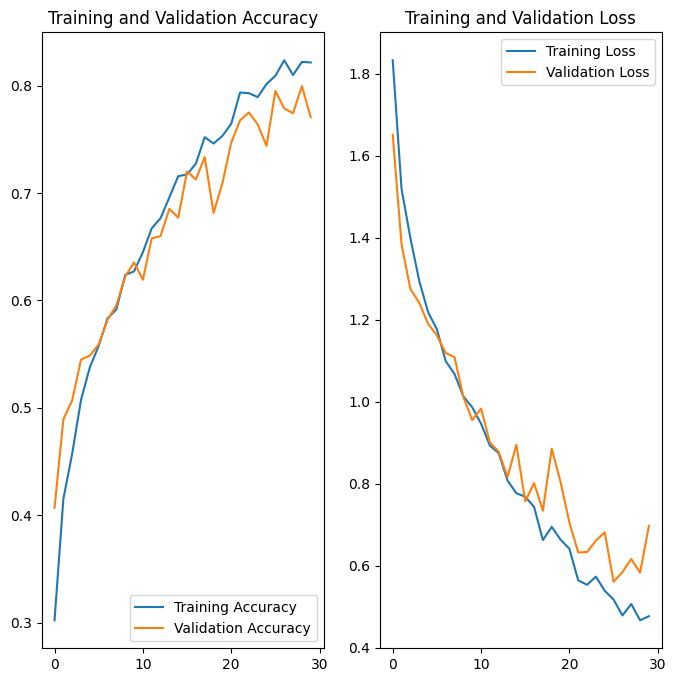

In [46]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Analyze your results here.

Findings:
We can infer that the Model is fit with a good enough accuracy for both Train and Validation Data of max accuracy around 85% Rectifying the Class Imbalance and performing Data augumentation on the dataset has resulted in a model with higher accuracy and overcoming overfitting This is a good model to be used to predict Skin Cancer using CNN